In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import json
import numpy as np
import pandas as pd
from scipy.constants import golden
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
%matplotlib inline

import sys; sys.path.append('../pyscripts')

from cases_reader import NationalCasesReader, RegionalCasesReader
from cases_viz import NationalCases, RegionalCases

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%config Completer. use_jedi = False

plt.rcParams['font.size'] = 10

pd.options.display.max_columns = 30

In [3]:
class Const():
    START_DATE = '2021-01-01'
    END_DATE = datetime.today().strftime('%Y-%m-%d')
    FOOTNOTE = 'Grafico di Raffaele Rainone | Fonte: git:pcm-dpc/COVID-19 | Dati aggiornati al {}'.format(END_DATE)
c = Const()

In [4]:
NATIONAL_CASES_FN = '../../COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
REG_DEMOGRAPHY_FN = '../../COVID-19/dati-statistici-riferimento/popolazione-istat-regione-range.csv'
REGIONAL_CASES_FN = '../../COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv'

# Load data

In [5]:
nat_cases_data_o = NationalCasesReader().run_pipeline()
reg_cases_data_o = RegionalCasesReader().run_pipeline()

In [6]:
nat_cases = NationalCases(nat_cases_data_o.cases_df, Const())
reg_cases = RegionalCases(reg_cases_data_o.cases_df, Const())

# National stats

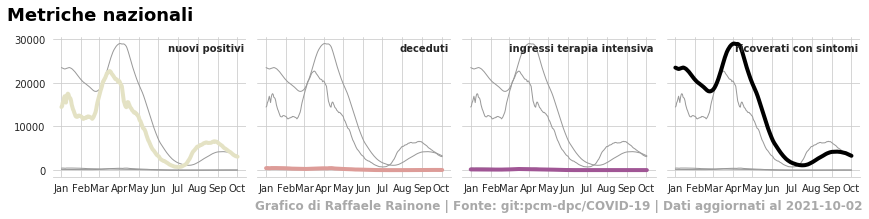

In [7]:
nat_cases.plot_small_multiples_many_metrics(
    '2021-01-01', 
    ['nuovi_positivi', 'deceduti', 'ingressi_terapia_intensiva', 'ricoverati_con_sintomi'],
    4,
    'Metriche nazionali',
    col_wrap=None, is_norm=False
)

Country | Renormalize!


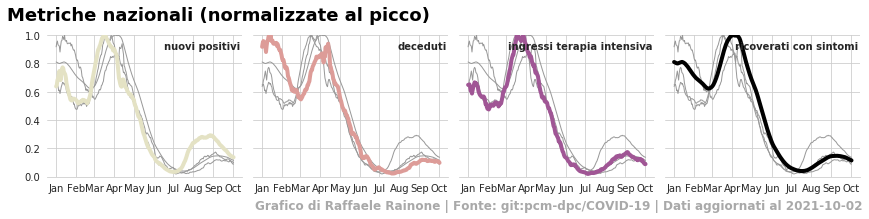

In [8]:
nat_cases.plot_small_multiples_many_metrics(
    '2021-01-01', 
    ['nuovi_positivi_norm', 'deceduti_norm', 'ingressi_terapia_intensiva_norm', 'ricoverati_con_sintomi_norm'],
    4,
    'Metriche nazionali (normalizzate al picco)',
    col_wrap=None, renorm=True
)

# Regional cases

Region | Renormalize!


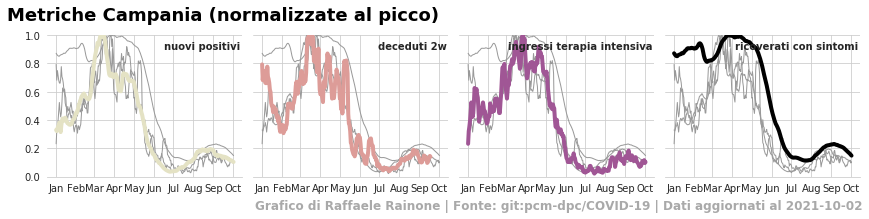

In [9]:
reg_cases.plot_small_multiples_many_metrics(
    '2021-01-01', 
    ['nuovi_positivi_norm', 'deceduti_2w_norm', 'ingressi_terapia_intensiva_norm', 'ricoverati_con_sintomi_norm'],
    4,
    'Metriche Campania (normalizzate al picco)',
    col_wrap=None,
    region='Campania',
    renorm=True
)

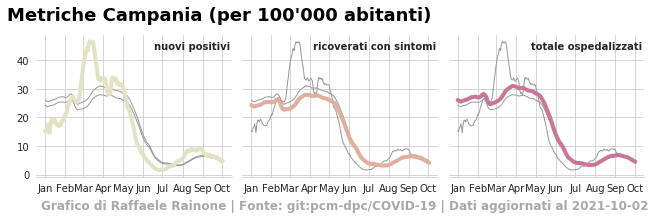

In [10]:
reg_cases.plot_small_multiples_many_metrics(
    '2021-01-01', 
    ['nuovi_positivi_reg', 'ricoverati_con_sintomi_reg', 'totale_ospedalizzati_reg'],
    5,
    "Metriche Campania (per 100'000 abitanti)",
    col_wrap=None,
    region='Campania', is_norm=False
)

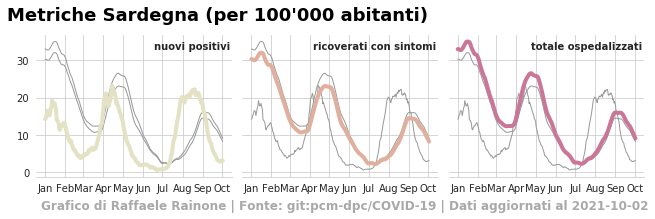

In [11]:
reg_cases.plot_small_multiples_many_metrics(
    '2021-01-01', 
    ['nuovi_positivi_reg', 'ricoverati_con_sintomi_reg', 'totale_ospedalizzati_reg'],
    5,
    "Metriche Sardegna (per 100'000 abitanti)",
    col_wrap=None,
    region='Sardegna', is_norm=False
)

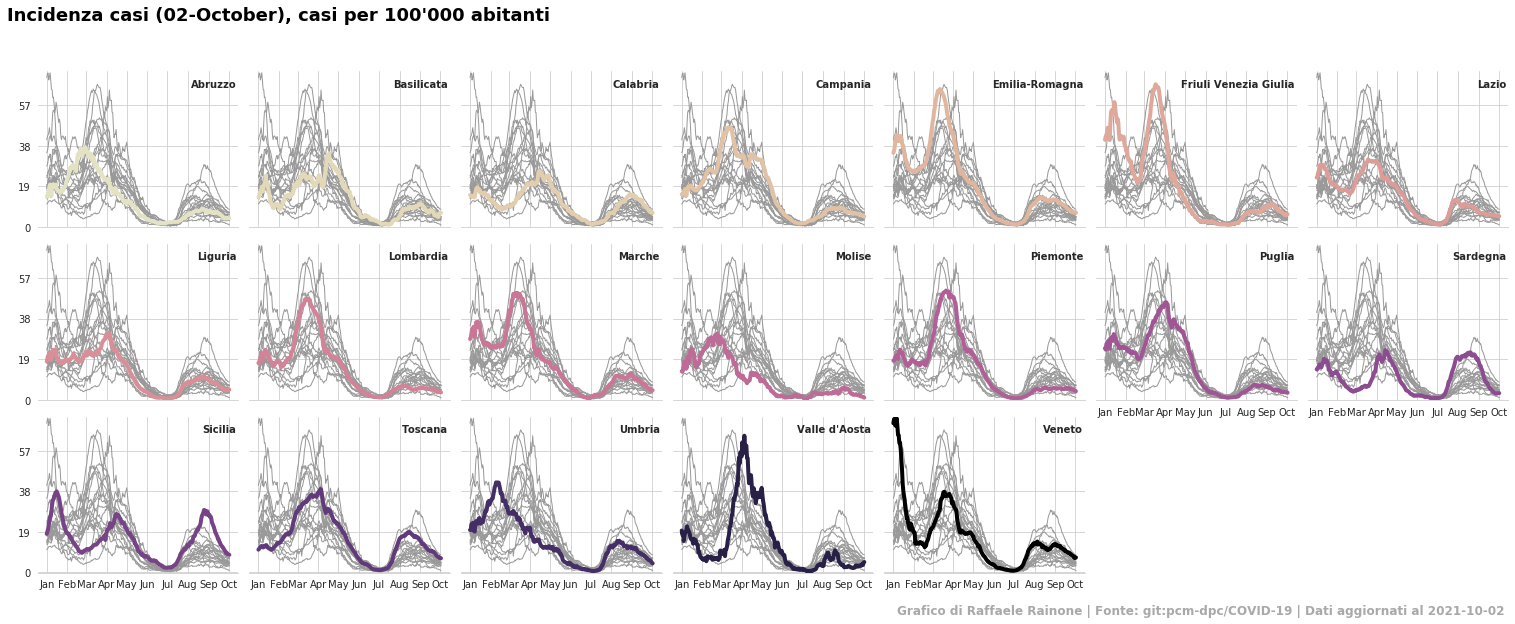

In [12]:
reg_cases.plot_small_multiples_single_metric_all_regions(
    '2021-01-01', 
    'nuovi_positivi_reg',
    'Incidenza casi ({:%d-%B}), casi per 100\'000 abitanti'.format(pd.to_datetime(c.END_DATE)),
)

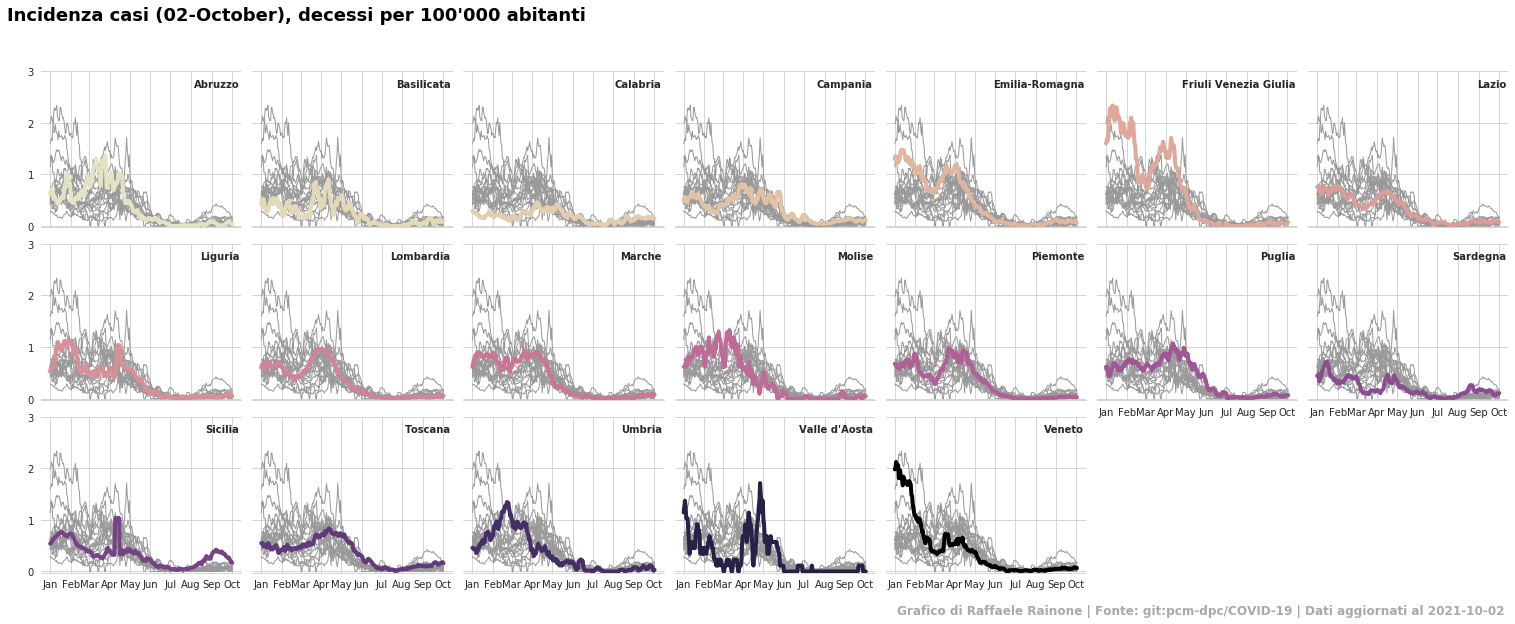

In [13]:
reg_cases.plot_small_multiples_single_metric_all_regions(
    '2021-01-01', 
    'deceduti_reg',
    'Incidenza casi ({:%d-%B}), decessi per 100\'000 abitanti'.format(pd.to_datetime(c.END_DATE)),
)

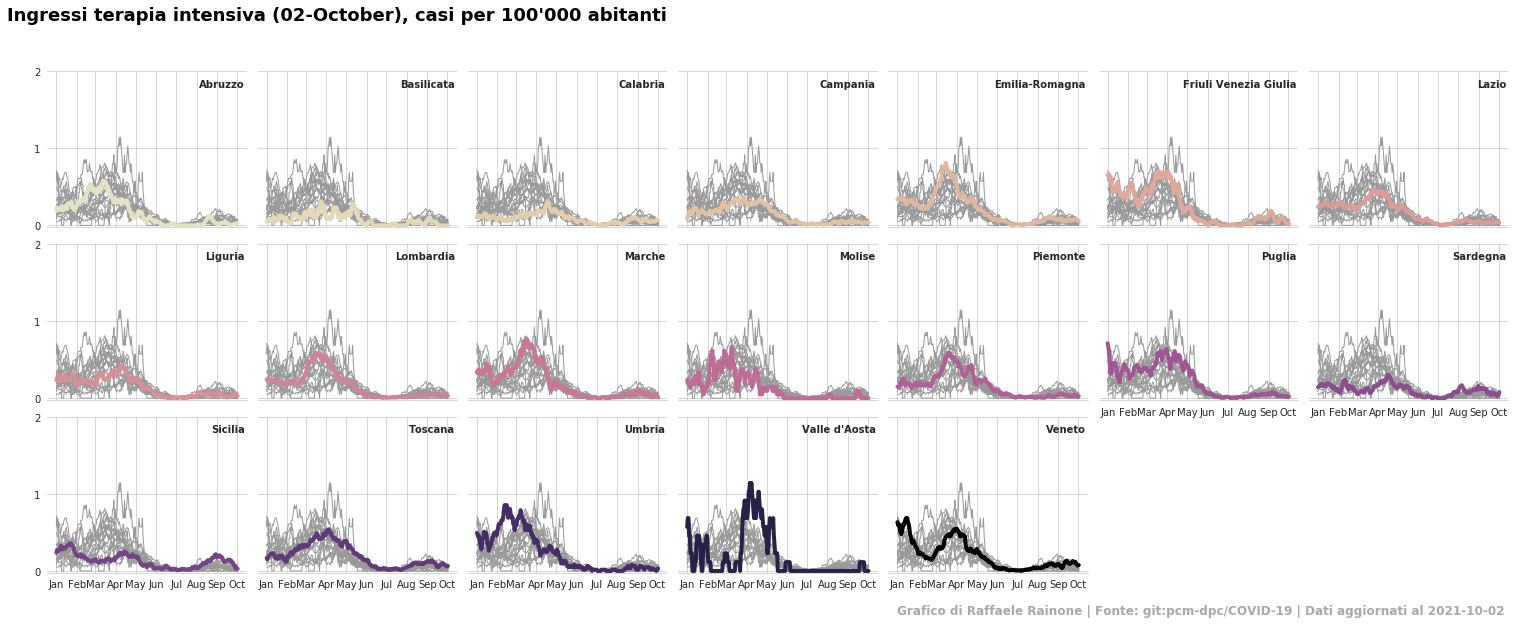

In [14]:
reg_cases.plot_small_multiples_single_metric_all_regions(
    '2021-01-01', 
    'ingressi_terapia_intensiva_reg',
    'Ingressi terapia intensiva ({:%d-%B}), casi per 100\'000 abitanti'.format(pd.to_datetime(c.END_DATE)),
)